### **Standard Lib Imports**

In [1]:
import os
from pathlib import Path
os.chdir(Path(os.getcwd()).parent)

In [2]:
from src import config
from src.helper import *

### Load Data

In [3]:
purchases = read_data('purchase.csv')
purchases = purchases.sort_values(by=['date', 'product_id']).reset_index(drop=True)
purchases['date'] = pd.to_datetime(purchases['date'])

In [4]:
product_details = read_data('product details.csv')
product_details = product_details.rename({'product_id*31': 'product_id'}, axis=1)

In [5]:
purchases.head()

,date,product_id,quantity
0,2020-01-01,2565157,3
1,2020-01-01,53739802,1
2,2020-01-01,53764509,2
3,2020-01-01,93405418,1
4,2020-01-01,109337124,1


In [6]:
product_details.head()

,product_id,manufacturer,main_category
0,283509384,Apple,Handy
1,241663414,Tamron,Kameras
2,103621251,ASUSTeKCOMPUTER,Tablets
3,336228170,Libratone,Audio & Hifi
4,330385166,Apple,Laptop


### Basic Analysis of Purchases

In [7]:
purchases = purchases.set_index('date')

In [8]:
daily, weekly, monthly, quarterly = time_aggregate_data(purchases.drop('product_id', axis=1))

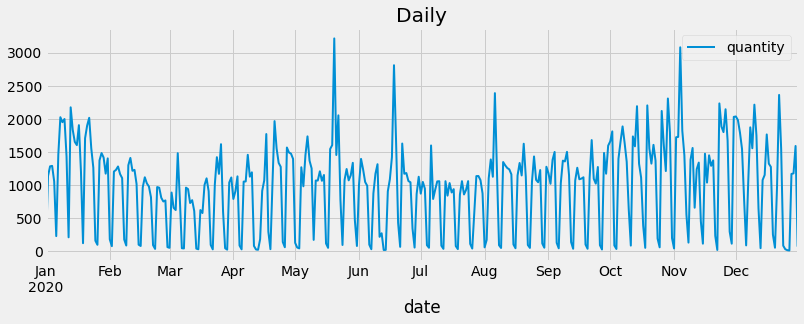

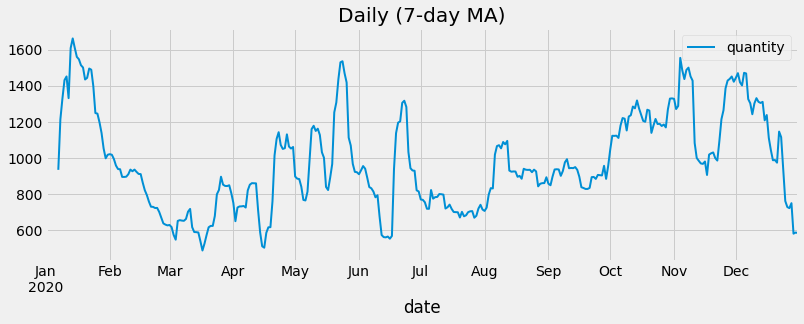

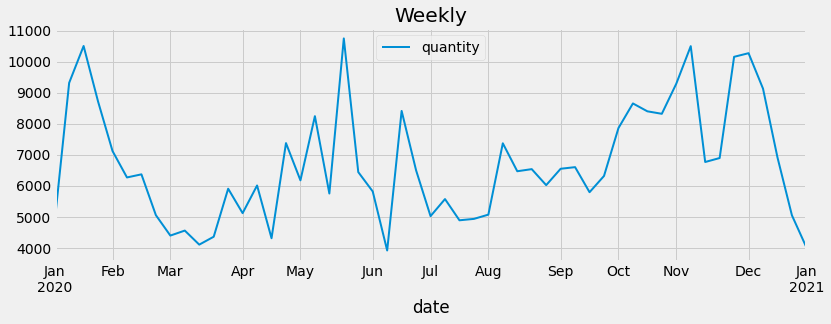

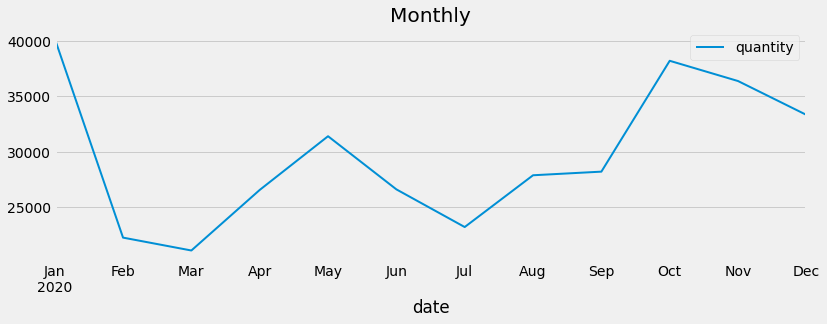

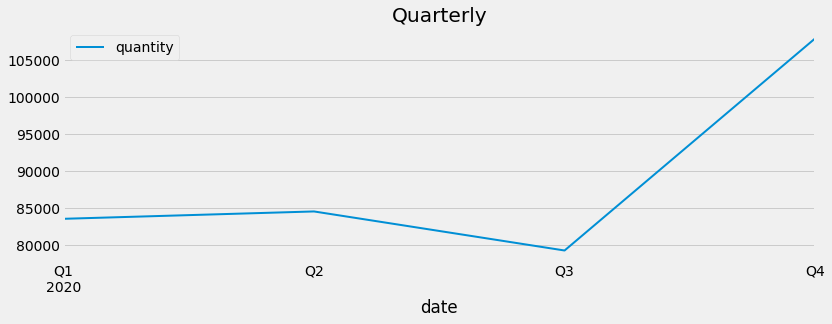

In [9]:
plot_ts_data(purchases.drop('product_id', axis=1))

- We observe here that the purchase quantity is the highest in the 4th quarter of the year by a large margin. 
- January and October contribute the largest number of purchases.

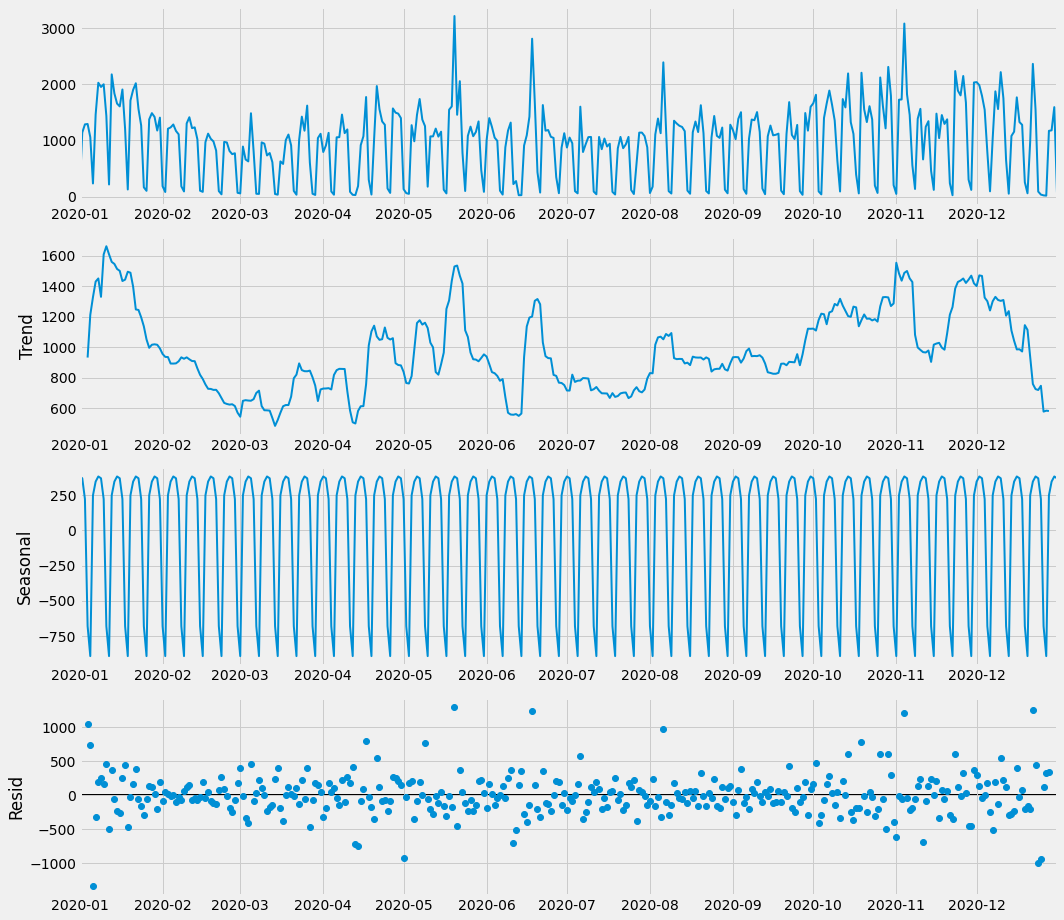

In [10]:
plot_decomposed(daily)

- Just like in Sales, there's a strong weekly seasonal component to the purchase data.

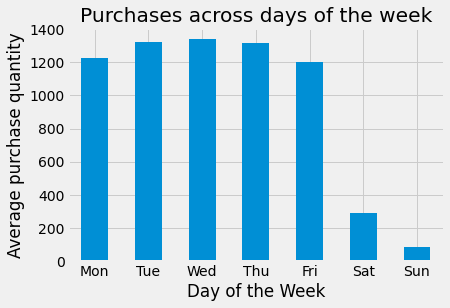

In [12]:
plot_by_day_of_week(daily, title='Purchases across days of the week',
                    xlabel='Day of the Week', ylabel='Average purchase quantity')

- As in sales, the number of products purchased during the weekend is very low compared to the rest of the week.

**Average number of products purchased**

In [13]:
print(f"Average number of products per day: {round(daily['quantity'].mean())}")
print(f"Average number of products per week: {round(weekly['quantity'].mean())}")
print(f"Average number of products per month: {round(monthly['quantity'].mean())}")
print(f"Average number of products per month: {round(quarterly['quantity'].mean())}")

Average number of products per day: 971
Average number of products per week: 6706
Average number of products per month: 29617
Average number of products per month: 88850


**Maximum number of products purchased**

In [14]:
print(f"Maximum no. of products sold in a day: {daily['quantity'].max()}")
print(f"Date at which this occurred: {daily.index[daily['quantity'].argmax()].date()}")

Maximum no. of products sold in a day: 3213
Date at which this occurred: 2020-05-20


### Top Products, Categories

**Top 10 Products in the year**

In [15]:
n = 10
top_products = purchases.groupby('product_id')['quantity'].sum().sort_values(ascending=False).head(n).reset_index()
top_products.merge(product_details, on=['product_id'])

,product_id,quantity,manufacturer,main_category
0,332538023,6427,Apple,Handy
1,332538209,4260,Apple,Handy
2,323343547,3833,Apple,Handy
3,332537930,3623,Apple,Handy
4,332537341,3044,Apple,Handy
5,323343671,2836,Apple,Handy
6,332538271,2620,Apple,Handy
7,338435897,2505,Samsung,Handy
8,323345190,2439,Sony,Konsolen
9,332538147,2427,Apple,Handy


**Top products purchased monthly**

In [17]:
purchases['month'] = purchases.index.month
top_prod_monthly = purchases.groupby(['month', 'product_id'])['quantity'].sum().reset_index()
top_prod_monthly = top_prod_monthly.groupby('month')[['product_id', 'quantity']]\
    .apply(lambda x: x.sort_values(by='quantity', ascending=False).head(1))\
        .reset_index(level=0).reset_index(drop=True)

In [18]:
top_prod_monthly.merge(product_details, on='product_id').sort_values(by='month')

,month,product_id,quantity,manufacturer,main_category
0,1,332538023,478,Apple,Handy
1,2,332538023,384,Apple,Handy
2,3,332538023,482,Apple,Handy
9,4,341257765,636,Apple,Handy
3,5,332538023,644,Apple,Handy
4,6,332538023,501,Apple,Handy
5,7,332538023,534,Apple,Handy
6,8,332538023,520,Apple,Handy
7,9,332538023,407,Apple,Handy
10,10,341256897,1110,Apple,Handy


**Top 5 Main Categories**

In [19]:
purchases_with_cat = purchases.merge(product_details, how='left', on='product_id')

In [20]:
purchases_with_cat.groupby('main_category')['quantity'].sum().sort_values(ascending=False).head(5).reset_index()

,main_category,quantity
0,Handy,181528
1,Konsolen,51148
2,Tablets,45785
3,Kameras,28296
4,Wearables,16139


**Takeaways**

- The biggest takeaway is that purchases and sales follow the same trend in terms of the products, i.e. the products which are being purchased at the highest quantities are also being sold at the highest quantities on the platform.
- The top categories and manufacturers on the purchase side are the same as the top categories and manufacturers on the sales side.
- The biggest **difference** between the purchase and the sales data is in the points of time where quantity is on the higher side. 
- The sales seem to be on the higher side during the months of December, November and to an extent even March.
- The purchases seem to be on the higher side during January, October and May.
- The average number of products sold per month is greater than the average number of products purchased per month (94631 sold vs. 88850 purchased)